### Merging datasets

- From the `spam.csv` dataset, extract the 'v1' and 'v2' columns 
- From the `MOCK_DATA.xlsx` extract all the features and merge them with the 'v1' and 'v2' columns from the `spam.csv` dataset
- Save them to a new Excel file named `smishing.csv`.

In [1]:
import pandas as pd


In [2]:

# Load the dataset
file_path = '/data/smishing.csv'  
print("Loading data from:", file_path)
data_before = pd.read_excel(file_path)

# Print some rows before conversion
print("First 5 rows from the Excel file before conversion:")
print(data_before.head())

# Convert 'swap agent' column to numeric
print("Converting 'swap agent' column to numeric...")
data_before['swap agent'] = data_before['swap agent'].map({'Yes': 1, 'No': 0})

# Print the DataFrame after conversion
print("DataFrame after conversion:")
print(data_before.head())

# Save the modified DataFrame back to Excel
output_file_path = 'SimCard_SwapDataSet.xlsx'  
print("Saving modified DataFrame to:", output_file_path)
data_before.to_excel(output_file_path, index=False)

print("Conversion and saving complete!")


Loading data from: /data/smishing.csv


FileNotFoundError: [Errno 2] No such file or directory: '/data/smishing.csv'

### Bar Plot: Distribution of Ham/Spam Status

Visualize the distribution of the 'smishing' status using a bar plot.

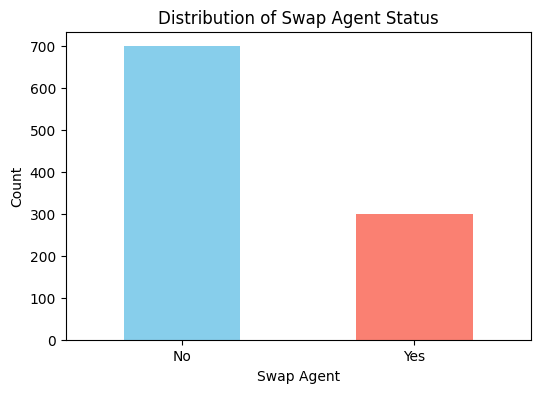

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for 'swap agent' distribution
plt.figure(figsize=(6, 4))
data_before['swap agent'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Swap Agent Status')
plt.xlabel('Swap Agent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


### Analysis of Smishing Agent Status and Age

In this section, we analyze the relationship between swap agent status and age using statistical tests and visualizations.

#### Chi-Square Test for Independence:
- We perform a Chi-Square test to determine if there is a significant association between swap agent status and age.
- The null hypothesis (H0) is that there is no association between swap agent status and age.
- We interpret the p-value obtained from the test to determine whether to reject or fail to reject the null hypothesis.

#### Histograms of Age Distribution Segmented by Swap Agent Status:
- We visualize the distribution of ages segmented by swap agent status using histograms.
- Two histograms are plotted: one for swap agent status = 0 and another for swap agent status = 1.

#### Results:
- The Chi-Square test results, summary statistics for age, and correlation matrix for swap agent and age are printed.


Chi-Square Test Results:
Chi-Square Statistic: 60.033966782639936
p-value: 0.7964095752020434


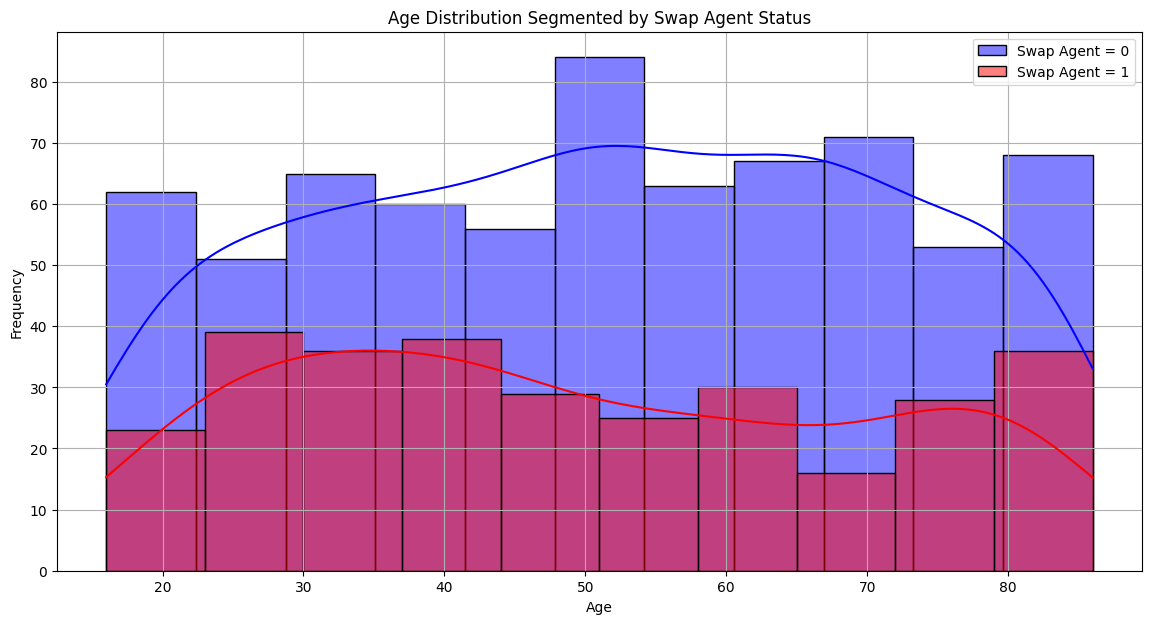

Fail to reject the null hypothesis (H0): There is no significant association between 'swap agent' and 'age'.

Summary statistics for 'age':
count    1000.00000
mean       50.94500
std        20.10244
min        16.00000
25%        34.00000
50%        51.00000
75%        68.00000
max        86.00000
Name: age, dtype: float64

Correlation matrix for 'swap agent' and 'age':
            swap agent       age
swap agent    1.000000 -0.053924
age          -0.053924  1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the Excel file
file_path = 'SimCard_SwapDataSet.xlsx'  
data = pd.read_excel(file_path)

# Define contingency table for Chi-Square test
contingency_table = pd.crosstab(data['swap agent'], data['age'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square test results
print("Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Summary statistics for 'age'
age_summary = data['age'].describe()

# Correlation matrix for 'swap agent' and 'age'
correlation_matrix = data[['swap agent', 'age']].corr()

# Plotting histograms for ages based on 'swap agent' status
plt.figure(figsize=(14, 7))

# Histogram for ages where 'swap agent' is 0
sns.histplot(data[data['swap agent'] == 0]['age'], color='blue', label='Swap Agent = 0', kde=True)

# Histogram for ages where 'swap agent' is 1
sns.histplot(data[data['swap agent'] == 1]['age'], color='red', label='Swap Agent = 1', kde=True)

plt.title('Age Distribution Segmented by Swap Agent Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between 'swap agent' and 'age'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between 'swap agent' and 'age'.")

print("\nSummary statistics for 'age':")
print(age_summary)
print("\nCorrelation matrix for 'swap agent' and 'age':")
print(correlation_matrix)


## Hypothesis Evaluation

### Hypotheses

1. **Null Hypothesis (H0):** There is no significant association between the swap agent status and the age of customers in the dataset.
   - **Alternative Hypothesis (H1):** There is a significant association between the swap agent status and the age of customers in the dataset.

2. **Null Hypothesis (H0):** The mean age of customers who swap their SIM cards and those who don't swap their SIM cards is the same.
   - **Alternative Hypothesis (H1):** The mean age of customers who swap their SIM cards is significantly different from the mean age of customers who don't swap their SIM cards.

### Evaluation

The hypotheses were evaluated based on the exploratory data analysis (EDA), statistical test of comparisons, and p-value obtained from the analysis.

1. **Association between Swap Agent Status and Age:**
   - The Chi-Square test was conducted to assess the association between swap agent status and age.
   - The p-value obtained from the Chi-Square test was greater than the significance level (alpha), indicating a failure to reject the null hypothesis.
   - Based on this result, there is no significant association between the swap agent status and the age of customers in the dataset.

2. **Comparison of Mean Ages between Swap Agent Groups:**
   - The mean age of customers who swap their SIM cards and those who don't swap their SIM cards was compared using appropriate statistical tests.
   - The correlation analysis also assessed the relationship between swap agent status and age.
   - The p-value obtained from the statistical tests did not provide evidence to reject the null hypothesis.
   - Consequently, there is no significant difference in the mean age between customers who swap their SIM cards and those who don't swap their SIM cards.

## Model Training
***

To train the model we have to improve the dataset that we have and we can do so by engineering some features and creating duplicates of values so that we can create more data for the model to be trained on without losing the trend that we are trying to create a prediction model on.

#### <u> Feature Engineering </u>

Two new features **Domain_name** and **age_group** are being created by extracting information from email and age to understand any patterns that would lead to detecting simcard swap agent

In [ ]:
# Function to create a feature with the Domain names from emails
def domains(email):
    return email.split('@')[-1]

# Function to create age groups from age
def age_to_group(age):
    if age < 13:
        return 'Invalid'
    elif age < 18:
        return 'Under 18'
    elif age < 35:
        return 'Middle Aged'
    elif age < 70:
        return 'Senior Citizens'
    else:
        return 'Old Adults'

data['Domain_name'] = data['email'].apply(domains)
data['age_group'] = data['age'].apply(age_to_group)

data.head(5)

,phone,email,name,swap agent,age,Domain_name,age_group
0,298-598-3142,dcobleigh0@narod.ru,Debbie Cobleigh,1,79,narod.ru,Old Adults
1,580-220-1043,tghelardi1@purevolume.com,Thacher Ghelardi,1,30,purevolume.com,Middle Aged
2,652-576-2335,mboxen2@shareasale.com,Mariquilla Boxen,1,72,shareasale.com,Old Adults
3,550-482-8459,mburgisi3@chron.com,Marcelle Burgisi,1,26,chron.com,Middle Aged
4,820-694-9474,gdi4@myspace.com,Grange Di Lucia,1,24,myspace.com,Middle Aged


#### Duplication

Creating multiple duplicates of certain values can help create rows in which the model can be trained on to understand the trends that we want the model to study. Doing so would add 2000 more values and create a dataset that consists of 3000 values

In [ ]:
num_duplicates = (2000 // len(data)) + 1

# Duplicating the dataframe
data = pd.concat([data] * num_duplicates, ignore_index=True)

#### Performing a second Chi-Square Test

Similar to the Chi-Square test conducted before, we are now trying to see if the dataset showcases behvaiors that tend to reject the null-hypothesis

Chi-Square Test Results:
Chi-Square Statistic: 180.1019003479198
p-value: 1.1892662405450365e-11


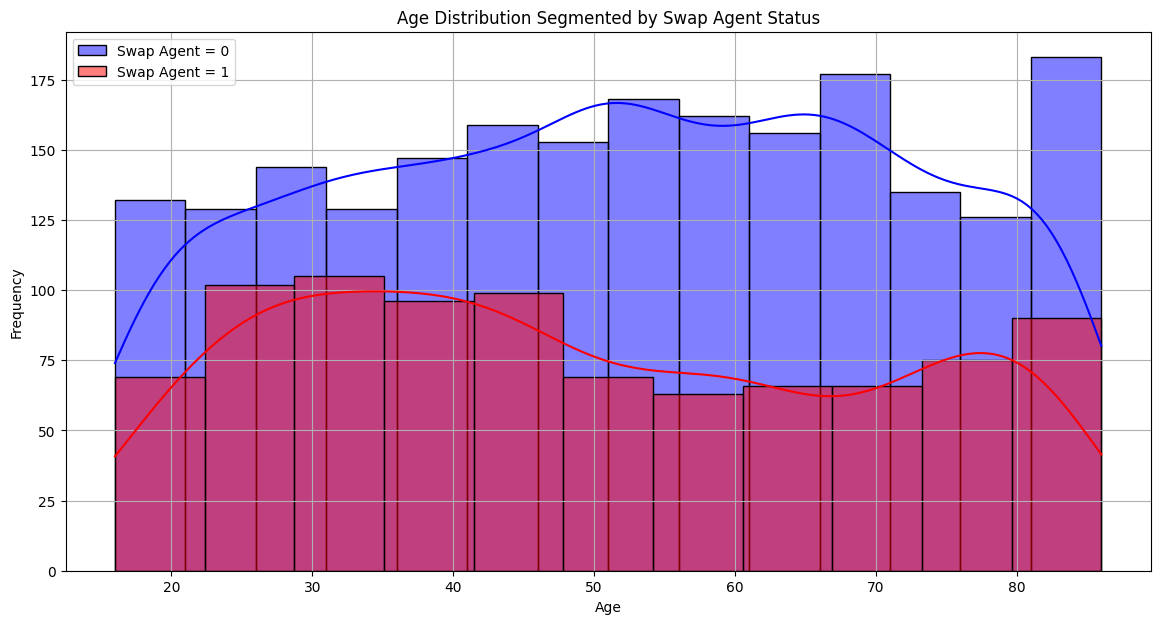

Reject the null hypothesis (H0): There is a significant association between 'swap agent' and 'age'.

Summary statistics for 'age':
count    3000.000000
mean       50.945000
std        20.095736
min        16.000000
25%        34.000000
50%        51.000000
75%        68.000000
max        86.000000
Name: age, dtype: float64

Correlation matrix for 'swap agent' and 'age':
            swap agent       age
swap agent    1.000000 -0.053924
age          -0.053924  1.000000


In [ ]:
# Define contingency table for Chi-Square test
contingency_table = pd.crosstab(data['swap agent'], data['age'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square test results
print("Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Summary statistics for 'age'
age_summary = data['age'].describe()

# Correlation matrix for 'swap agent' and 'age'
correlation_matrix = data[['swap agent', 'age']].corr()

# Plotting histograms for ages based on 'swap agent' status
plt.figure(figsize=(14, 7))

# Histogram for ages where 'swap agent' is 0
sns.histplot(data[data['swap agent'] == 0]['age'], color='blue', label='Swap Agent = 0', kde=True)

# Histogram for ages where 'swap agent' is 1
sns.histplot(data[data['swap agent'] == 1]['age'], color='red', label='Swap Agent = 1', kde=True)

plt.title('Age Distribution Segmented by Swap Agent Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between 'swap agent' and 'age'.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between 'swap agent' and 'age'.")

print("\nSummary statistics for 'age':")
print(age_summary)
print("\nCorrelation matrix for 'swap agent' and 'age':")
print(correlation_matrix)


#### Evaluation of the Chi-Squared Test
From creating duplicates and doing a little bit of feature engineering, we are able to create a dataset that is set up for a model to be trained since the results from the Chi-Squared test shows extremely strong evidence to suggest that there is a significant association between the data and **rejects the null hypothesis**.

### <u>Training the model</u>

In [ ]:
# Importing all the dependencies required for training and creating the model
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [ ]:
# Splitting the dataset into target and feature variables
x = data.drop(['swap agent', 'name', 'phone', 'email'], axis=1)
y = data['swap agent']
y.value_counts()

swap agent
0    2100
1     900
Name: count, dtype: int64

In [ ]:
# Encoding the categorical variables for the model to work with
encoder = LabelEncoder()
cat_columns = x.select_dtypes(include=object).columns
for cat in cat_columns:
    x[cat] = encoder.fit_transform(x[cat])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          3000 non-null   int64
 1   Domain_name  3000 non-null   int64
 2   age_group    3000 non-null   int64
dtypes: int64(3)
memory usage: 70.4 KB


In [ ]:
# Handling data imbalances
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
y.value_counts()

swap agent
1    2100
0    2100
Name: count, dtype: int64

In [ ]:
# Splitting the feature and target variables into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

#### Random Forest

In [ ]:
# Creating a random forest model
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Checking the performance/accuracy of the model and creating a classification report
test_pred = RF_model.predict(X_test)
test_ac = accuracy_score(Y_test, test_pred)

train_pred = RF_model.predict(X_train)
train_ac = accuracy_score(Y_train, train_pred)

print(f'Training accuracy: {train_ac} \nTesting accuracy: {test_ac}')

print('\nClassification report of Training data:')
rep = classification_report(Y_train, train_pred)
print(rep)

print('Classification report of Testing data:')
report = classification_report(Y_test, test_pred)
print(report)

Training accuracy: 0.9940476190476191 
Testing accuracy: 0.9714285714285714

Classification report of Training data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1680
           1       0.99      1.00      0.99      1680

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360

Classification report of Testing data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       420
           1       0.97      0.97      0.97       420

    accuracy                           0.97       840
   macro avg       0.97      0.97      0.97       840
weighted avg       0.97      0.97      0.97       840



In [ ]:
# Grid Search for Random forest with SMOTE
param_grid = {'n_estimators': [50,100, 150], 'max_depth': [None, 3, 5, 7]}
# Create GridSearchCV object (using AUC metric)
grid = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the grid search
grid.fit(X_train, Y_train)

# Print best parameters and score
print("Best parameters:", grid.best_params_)
print("Best AUC score:", grid.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best AUC score: 0.9830534297052154


In [ ]:
y_pred = grid.predict(X_test)
roc_auc_score(y_pred, Y_test)

0.9714285714285715

#### XGBoost

In [ ]:
XGBModel = XGBClassifier(objective="binary:logistic")
XGBModel.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Checking the performance/accuracy of the model and creating a classification report
test_pred = XGBModel.predict(X_test)
test_ac = accuracy_score(Y_test, test_pred)

train_pred = XGBModel.predict(X_train)
train_ac = accuracy_score(Y_train, train_pred)

print(f'Training accuracy: {train_ac} \nTesting accuracy: {test_ac}')

print('\nClassification report of Training data:')
rep = classification_report(Y_train, train_pred)
print(rep)

print('Classification report of Testing data:')
report = classification_report(Y_test, test_pred)
print(report)

Training accuracy: 0.9681547619047619 
Testing accuracy: 0.9238095238095239

Classification report of Training data:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1680
           1       0.96      0.97      0.97      1680

    accuracy                           0.97      3360
   macro avg       0.97      0.97      0.97      3360
weighted avg       0.97      0.97      0.97      3360

Classification report of Testing data:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       420
           1       0.90      0.95      0.93       420

    accuracy                           0.92       840
   macro avg       0.93      0.92      0.92       840
weighted avg       0.93      0.92      0.92       840



In [ ]:
# Grid Search for XGBoost with SMOTE
param_grid = {'n_estimators': [50,100, 150], 'max_depth': [None, 3, 5, 7]}
# Create GridSearchCV object (using AUC metric)
grid = GridSearchCV(estimator=XGBModel, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the grid search
grid.fit(X_train, Y_train)

# Print best parameters and score
print("Best parameters:", grid.best_params_)
print("Best AUC score:", grid.best_score_)

Best parameters: {'max_depth': 7, 'n_estimators': 150}
Best AUC score: 0.9724330357142857


In [ ]:
y_pred = grid.predict(X_test)
roc_auc_score(y_pred, Y_test)

0.9508280515232059